In [1]:
from auto_diagnostic.tfidf import TFIDF
from auto_diagnostic.lemmatization import Lemmatization
from auto_diagnostic.preprocess import tokenize

from dataloader.makedata import Dataloader

In [2]:
tfidf = TFIDF()
df = Dataloader().make_csv()
tokenized = tokenize(df['text_column'])
model = Lemmatization()
lemmatized_list = model.lemmatize(tokenized)
word_set = tfidf.get_wordset_from_text(lemmatized_list)
tfidf_vectors = tfidf.tf_idf()
closest = tfidf.get_closest_neighbors(vectors=tfidf_vectors)
print(closest)


[nltk_data] Downloading package stopwords to /home/aizen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/home/aizen/dev/atlantico-academy/cognitive-comp/auto-diagnostic/dataloader/makedata.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[text_field][i] = unidecode.unidecode(df[text_field].iloc[i])

/home/aizen/dev/atlantico-academy/cognitive-comp/auto-diagnostic/dataloader/makedata.py:33: FutureWarning: The default value of regex will change from True to False in a future version.
  df[text_field] = df[text_field].str.replace(r"[()\;\,\%\-\/\--\.!?@\'\`\"\_\n]", " ")

[nltk_data] Downloading package stopwords to /home/aizen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[{'key': (5, 'portanto', 0.017748443809982348), 'neighbors': [(3, 'segmentectomia', 0.016576579335681296), (4, 'tabaco', 0.01457326378493001), (6, 'alteraco', 0.017748443809982348), (7, 'participar', 0.017748443809982348)]}, {'key': (6, 'alteraco', 0.017748443809982348), 'neighbors': [(4, 'tabaco', 0.01457326378493001), (5, 'portanto', 0.017748443809982348), (7, 'participar', 0.017748443809982348), (8, 'observar', 0.017748443809982348)]}, {'key': (7, 'participar', 0.017748443809982348), 'neighbors': [(5, 'portanto', 0.017748443809982348), (6, 'alteraco', 0.017748443809982348), (8, 'observar', 0.017748443809982348), (9, 'motivo', 0.017748443809982348)]}, {'key': (8, 'observar', 0.017748443809982348), 'neighbors': [(6, 'alteraco', 0.017748443809982348), (7, 'participar', 0.017748443809982348), (9, 'motivo', 0.017748443809982348), (10, 'semelhante', 0.016576579335681296)]}, {'key': (9, 'motivo', 0.017748443809982348), 'neighbors': [(7, 'participar', 0.017748443809982348), (8, 'observar', 

tamanho de node_sizes: {'portanto': 0.017748443809982348, 'segmentectomia': 0.016576579335681296, 'tabaco': 0.01457326378493001, 'alteraco': 0.017748443809982348, 'participar': 0.017748443809982348, 'observar': 0.017748443809982348, 'motivo': 0.017748443809982348, 'semelhante': 0.016576579335681296, 'prevalente': 0.017748443809982348}
tamanho de edge_weights: {('portanto', 'segmentectomia'): 2, ('portanto', 'tabaco'): 1, ('portanto', 'alteraco'): 1, ('portanto', 'participar'): 2, ('tabaco', 'alteraco'): 2, ('alteraco', 'participar'): 1, ('alteraco', 'observar'): 2, ('participar', 'observar'): 1, ('participar', 'motivo'): 2, ('observar', 'motivo'): 1, ('observar', 'semelhante'): 2, ('motivo', 'semelhante'): 1, ('motivo', 'prevalente'): 2}


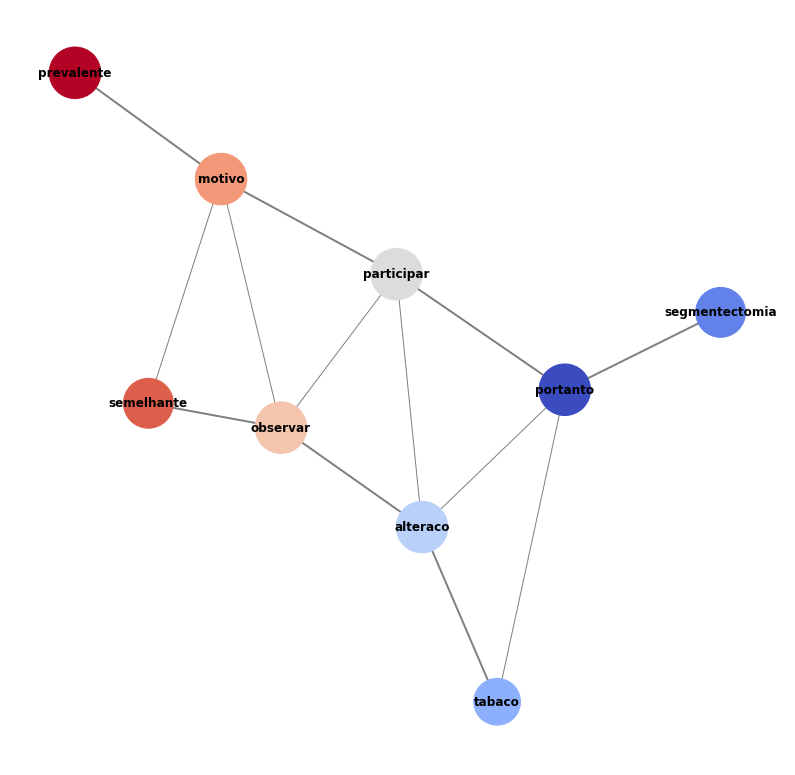

In [3]:
import networkx as nx
from matplotlib import pyplot as plt


plt.subplots(figsize=(14, 14))

G = nx.Graph()

for node in closest:

    node_key = node['key']
    close_nodes = node['neighbors']

    G.add_node(node_key[1])

    for n in close_nodes:
        G.add_node(n[1], size=n[2])
        G.add_edge(node_key[1], n[1], weight=abs(node_key[0] - n[0]))

node_sizes = nx.get_node_attributes(G, 'size')
edge_weights = nx.get_edge_attributes(G, 'weight')

print(f'tamanho de node_sizes: {node_sizes}')
print(f'tamanho de edge_weights: {edge_weights}')


pos = nx.spring_layout(G, k=0.5, iterations=20)

cmap = plt.cm.coolwarm
colors = [n for n in range(len(G.nodes()))]

nx.draw(
    G,
    pos,
    with_labels=True,
    font_size=12,
    font_weight='bold',
    node_size=[n*1.5*10**5 for n in node_sizes.values()],
    width=list(edge_weights.values()),
    cmap=cmap,
    node_color=colors,
    edge_color='grey',
    alpha=1
)